# 의사결정나무로 간단한 분류 예측 모델 만들기

## 1. 데이터셋 출처
 - https://www.kaggle.com/uciml/pima-indians-diabetes-database

### 1-1. 데이터 구성
- Pregnancies: 임신횟수
- Glucose: 2시간동안 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure: 이완기 혈압(mm Hg)
- SkinThickness: 삼두근 피부 주름 두께(mm), 체지방을 추정하는데 사용되는 값
- Insulin: 2시간동안 혈청 인슐린
- BMI: 체질량 지수
- DiabetesPedigreeFunction: 당뇨병 혈통 기능
- Age: 나이
- Outcome: 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0 입니다.

## 2. 필요한 라이브러리 설치 & 로드
- 학습목표
    - 학습과 예측을 위해 데이터셋을 나누는 방법을 이해합니다.

- 핵심 키워드
    - train 데이터셋
    - test 데이터셋
    - 슬라이싱

In [1]:
# 데이터 분석을 위한 pandas
# 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 3. 데이터셋 로드

In [2]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head(3)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## 4. 학습, 예측 데이터셋 나누기

In [3]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [4]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
train.shape

(614, 9)

In [5]:
# 20% 는 Test 데이터로 만듭니다.
test = df[split_count:].copy()
test.shape

(154, 9)

## 5. 학습, 예측에 사용할 컬럼

In [6]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 6. 정답값이자 예측해야 될 값

In [7]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = train.columns[-1]
label_name

'Outcome'

## 7. 학습, 예측 데이터셋 만들기

In [8]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head(3)

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [9]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head(3)

(614,)


0    1
1    0
2    1
Name: Outcome, dtype: int64

In [10]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head(3)

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30


In [11]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head(3)

(154,)


614    1
615    0
616    0
Name: Outcome, dtype: int64

## 8. 머신러닝 알고리즘 가져오기
- 의사결정나무로 학습과 예측하기

- 핵심 키워드
    - DecisionTreeClassifier
    - fit, predict

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 9. 학습(훈련)
- 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 10. 예측
- 실전 시험문제(X_train)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [14]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

## 11. 트리 알고리즘 분석하기
- 의사결정나무를 시각화 합니다.

- 학습목표
    - 모델을 시각화하여 분석하고, feature 중에서 모델에 영향을 미친 정도를 확인할 수 있습니다.
    - 정확도를 계산하는 방법을 이해합니다.

- 핵심 키워드
    - plot_tree
    - feature_importances
    - accuracy_score

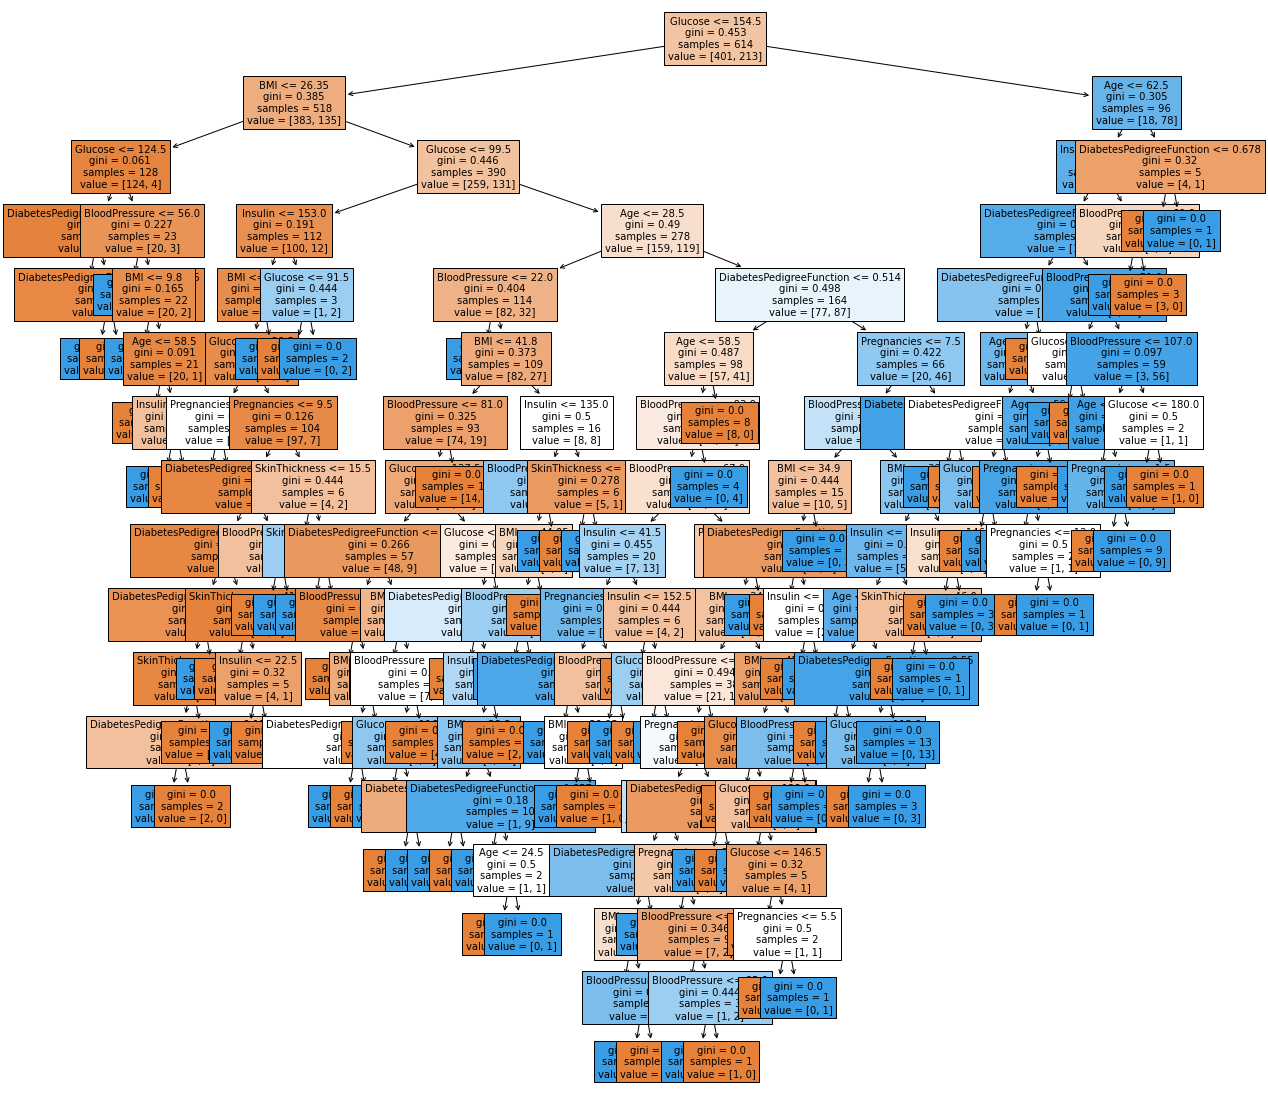

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 20))
tree = plot_tree(
    model,
    feature_names = feature_names,
    filled = True,
    fontsize = 10
)

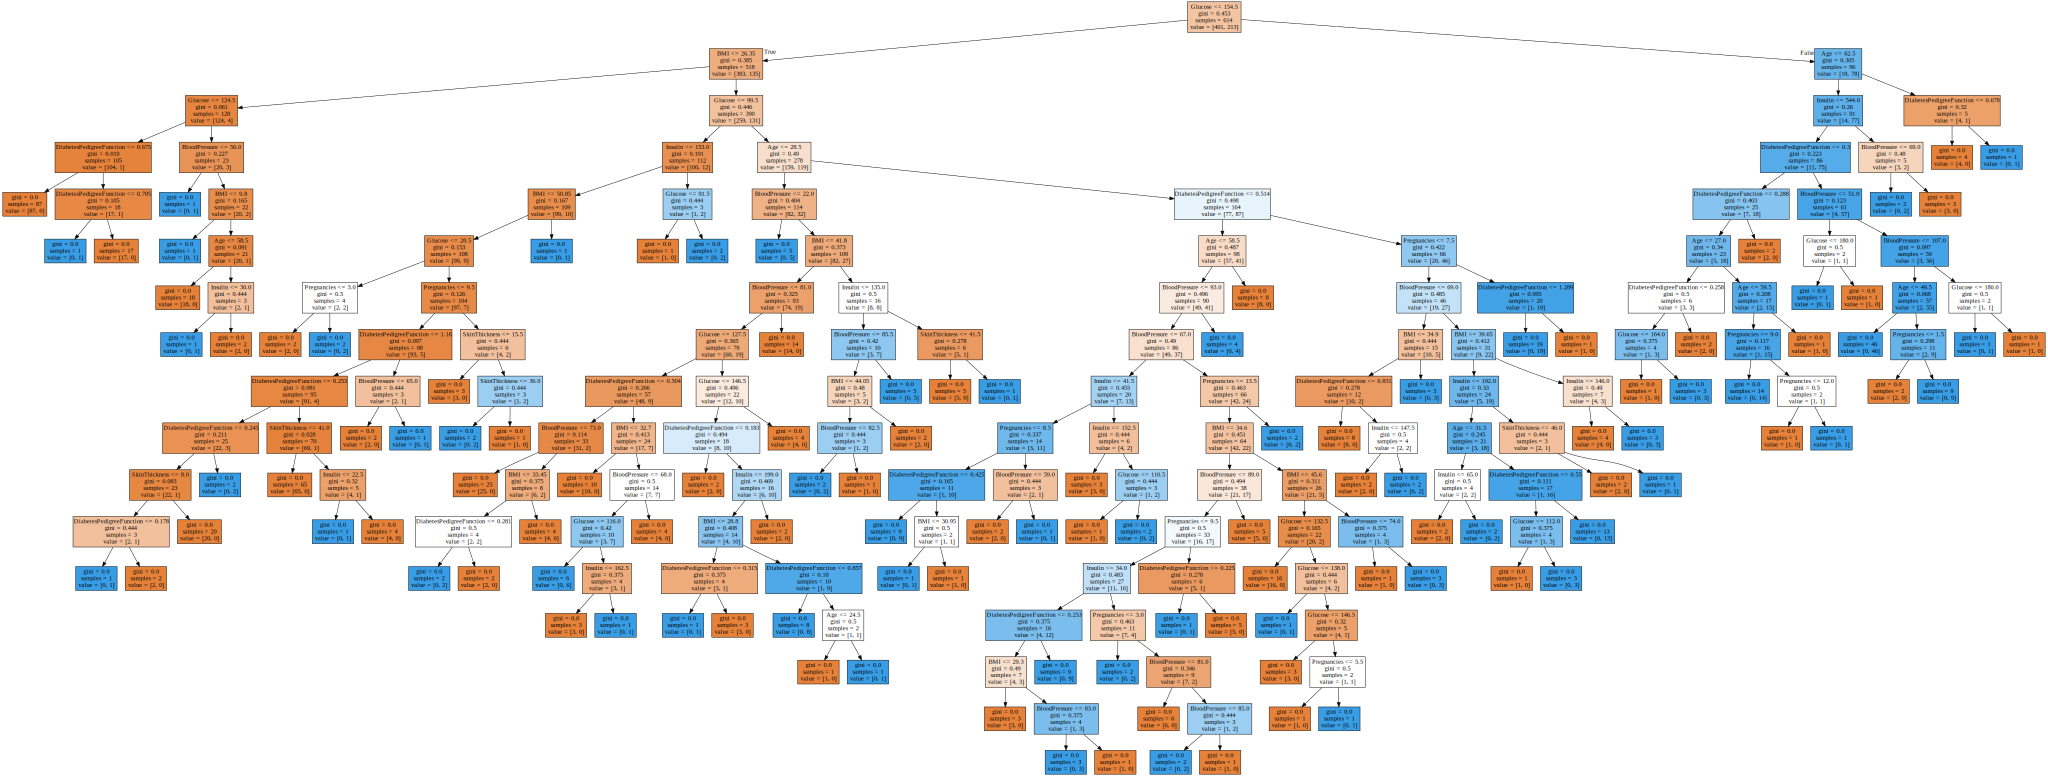

In [19]:
# graphviz 를 통해 시각화를 합니다.
# graphviz 는 별도의 설치가 필요합니다.
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(
    model,
    feature_names = feature_names,
    filled = True
)

graphviz.Source(dot_tree)

In [21]:
# 피처의 중요도를 추출하기
model.feature_importances_

array([0.07087086, 0.30763621, 0.13665392, 0.02378638, 0.09437303,
       0.15710691, 0.13132779, 0.0782449 ])

<AxesSubplot:>

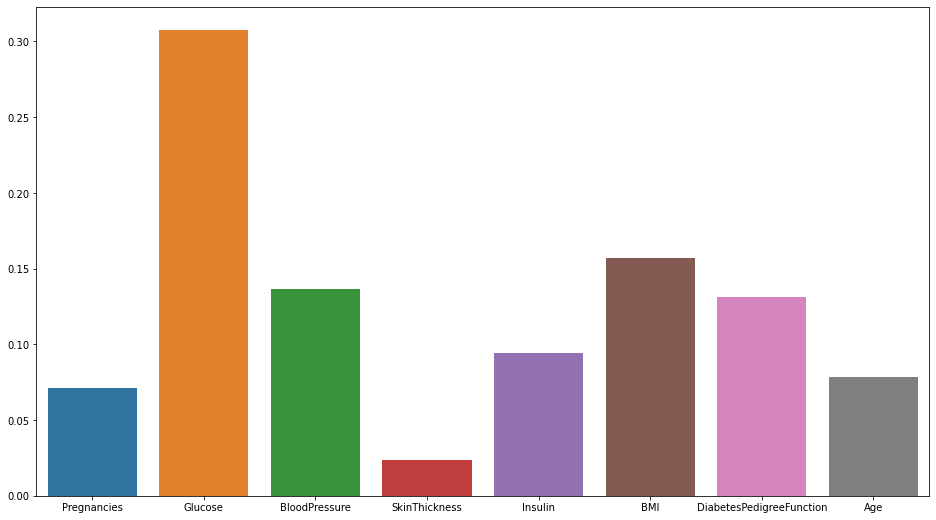

In [32]:
# 피처의 중요도 시각화 하기
plt.figure(figsize = (16, 9))
sns.barplot(
    x = feature_names,
    y = model.feature_importances_,
)

## 12. 정확도(Accuracy) 측정하기

In [44]:
# 실제값 - 예측값을 빼주면 같은 값은 0 으로 나오게 됩니다.
# 여기서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

# diff_count = abs(y_test - y_predict).sum() / len(y_test) # 26.6% 잘못 예측했다.
diff_count = abs(y_test - y_predict).sum()
diff_count

41

In [48]:
# 예측의 정학도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.
(len(y_test) - diff_count) / len(y_test) * 100

73.37662337662337

In [50]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

73.37662337662337

In [53]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test) * 100

73.37662337662337